# Havza algoritması
Havza, segmentasyon için, yani bir görüntüdeki farklı nesneleri ayırmak için kullanılan klasik bir algoritmadır.
Herhangi bir gri tonlamalı görüntü, yüksek yoğunluğun zirveleri ve tepeleri, düşük yoğunluğun vadileri ifade ettiği bir topografik yüzey olarak görülebilir.
İzole edilmiş her vadiyi (yerel minimum) farklı renkli suyla (etiketler doldurmaya başlarsınız.
Su yükseldikçe, yakınlardaki zirvelere (gradyanlara) bağlı olarak, farklı vadilerden gelen su, belli ki farklı renklerle birleşmeye başlayacaktır.
Bundan kaçınmak için suyun birleştiği yerlere bariyerler inşa edersiniz. Tüm zirveler su altında kalana kadar su doldurma ve bariyerler inşa etme işine devam ediyorsunuz.
Daha sonra oluşturduğunuz engeller size segmentasyon sonucunu verir.

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'ilk goruntu'))

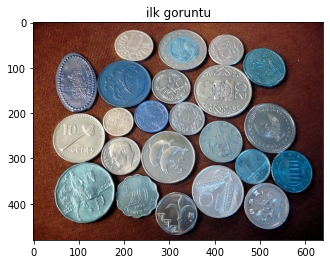

In [8]:
#kütüphaneleri import edelim
import cv2
import matplotlib.pyplot as plt
import numpy as np


# gorseli al
coin = cv2.imread("img/coins.jpg")
plt.figure(),plt.imshow(coin),plt.title("ilk goruntu")


(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'blurlanmıs goruntu'))

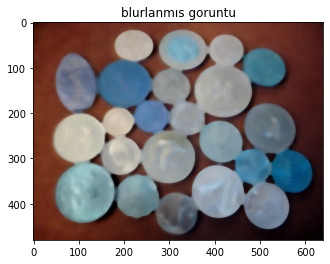

In [9]:

#blurla
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(),plt.imshow(coin_blur),plt.title("blurlanmıs goruntu")


(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'siyah-beyaz goruntu'))

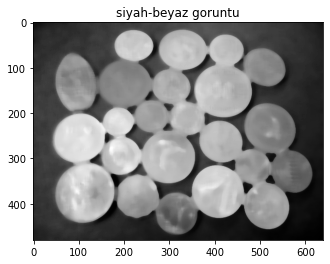

In [10]:

#resmi siyah beyaz yap
coin_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
plt.figure(),plt.imshow(coin_gray, cmap="gray"),plt.title("siyah-beyaz goruntu")


(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'threshlenmis goruntu'))

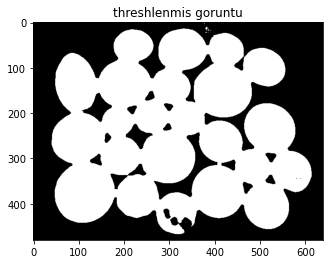

In [16]:
#reshold uygulayalım
ret, coin_thresh = cv2.threshold(coin_gray, 75, 255, cv2.THRESH_BINARY)
plt.figure(),plt.imshow(coin_thresh, cmap="gray"),plt.title("threshlenmis goruntu")



(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'konturlari cizilmis goruntu'))

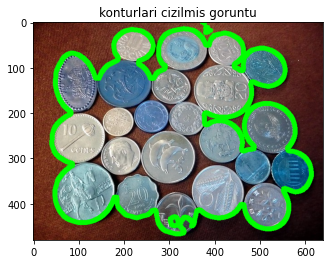

In [17]:

#kontur bulalim
contours, hierarchy =cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    #external contour
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(0,255,0),10)
plt.figure(),plt.imshow(coin),plt.title("konturlari cizilmis goruntu")
            

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'konturlari cizilmis goruntu'))

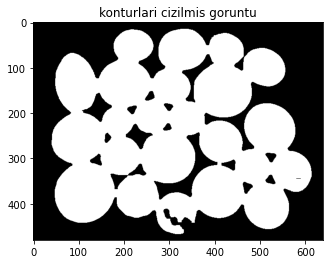

In [19]:
#morfolojik (açılma işlemini uygulayacağız)

kernel= np.ones((3,3),np.uint8)
opening= cv2.morphologyEx(coin_thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
plt.figure(),plt.imshow(opening, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'konturlari cizilmis goruntu'))

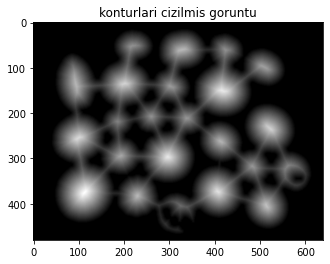

In [21]:
# iki nesne arasındaki distance bulacagız
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.figure(),plt.imshow(dist_transform, cmap="gray"),plt.title("distance uygulanmıs goruntu")


(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'nesneleri kucultulmus goruntu'))

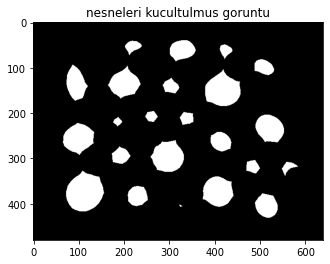

In [22]:
#nesneleri kucult
ret, sure_foregraund= cv2.threshold(dist_transform,0.4*np.max(dist_transform),255,0)
plt.figure(),plt.imshow(sure_foregraund, cmap="gray"),plt.title("nesneleri kucultulmus goruntu")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1b8b2e077f0>)

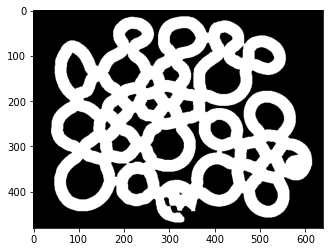

In [24]:
#arka plan için nesneleri buyut
sure_backgraund = cv2.dilate(opening, kernel, iterations = 1)
sure_backgraund=np.uint8(sure_backgraund)
sure_foregraund=np.uint8(sure_foregraund)
unknow=cv2.subtract(sure_backgraund,sure_foregraund)
plt.figure(),plt.imshow(unknow, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1b8b3bffeb0>)

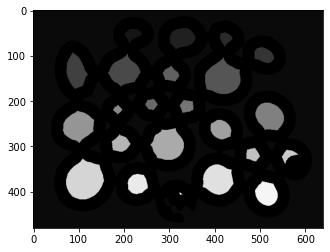

In [33]:
#baglanti
ret, marker = cv2.connectedComponents(sure_foregraund)
marker = marker + 1
marker[unknow == 255] =0
plt.figure(),plt.imshow(marker, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1b8b5131b50>)

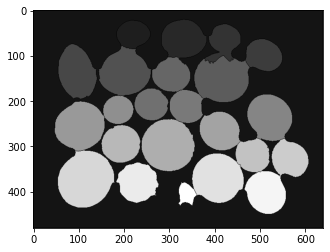

In [34]:
#havza
marker = cv2.watershed(coin,marker)
plt.figure(),plt.imshow(marker, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'konturlari cizilmis goruntu'))

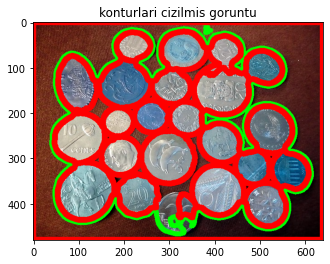

In [36]:
#kontur cizelim
contours, hierarchy =cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    #external contour
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.title("konturlari cizilmis goruntu")